# Uso de ARIMA Model para la predicción del clima a mediano plazo

### Información

Para el siguiente ejercicio vamos a utiliza la base de datos de temperatura de la Universidad de Delaware, la cual esta disponible en [LINK]("http://climate.geog.udel.edu/~climate/html_pages/download.html#T2017"), para tu comodidad esta información ya se encuentra preprocesada en la siguiente ruta [LINK](https://drive.google.com/open?id=1JZ8vtFv4W8TaxrWZSGIZSeFyGVLQE_me) , solo es necesario que descargues el archivo y lo coloques en la siguiente ruta: `data/ejemplo_arima.csv`.

Source: Willmott, C. J. and K. Matsuura (2001) Terrestrial Air Temperature and Precipitation: Monthly and Annual Time Series (1900 - 2017), http://climate.geog.udel.edu/~climate/html_pages/download.html#T2017

### Estructura

La estructura de la base de datos es la siguiente:

>Fecha : Fecha correspondiente al dato : AAAA-MM-DD

>Lat   : Latitud                       : Float

>Long  : Longitud                      : Float

>Valor : Valor de temperatura          : Float



In [1]:
# librerías
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
import seaborn as sns

warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

import pandas as pd
import statsmodels.api as sm

%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 18, 8

In [3]:
# leer csv
df = pd.read_csv("data/ejemplo_arima.csv")

In [4]:
# verificar estructura del archivo
df.head()

,Fecha,Lat,Long,Valor
0,1900-01-01,22.25,-102.25,11.7
1,1900-02-01,22.25,-102.25,13.1
2,1900-03-01,22.25,-102.25,14.5
3,1900-04-01,22.25,-102.25,16.5
4,1900-05-01,22.25,-102.25,19.6


In [5]:
# estadísticas básicas del df
df.describe()

,Lat,Long,Valor
count,1416.00,1416.00,1416.000000
mean,22.25,-102.25,16.968503
std,0.00,0.00,3.128690
min,22.25,-102.25,9.000000
25%,22.25,-102.25,14.300000
50%,22.25,-102.25,17.700000
75%,22.25,-102.25,19.400000
max,22.25,-102.25,27.200000


In [6]:
# inforamción general del df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1416 entries, 0 to 1415
Data columns (total 4 columns):
Fecha    1416 non-null object
Lat      1416 non-null float64
Long     1416 non-null float64
Valor    1416 non-null float64
dtypes: float64(3), object(1)
memory usage: 44.4+ KB


In [7]:
# convertir la columna Fecha de objeto a formato datatime
df["Fecha"] = pd.to_datetime(df["Fecha"])
df.index = df["Fecha"]
df.head()

,Fecha,Lat,Long,Valor
Fecha,,,,
1900-01-01,1900-01-01,22.25,-102.25,11.7
1900-02-01,1900-02-01,22.25,-102.25,13.1
1900-03-01,1900-03-01,22.25,-102.25,14.5
1900-04-01,1900-04-01,22.25,-102.25,16.5
1900-05-01,1900-05-01,22.25,-102.25,19.6


In [8]:
# obtener la serie de tiempo para análisis
ts = df["Valor"]

In [9]:
# desplegar la serie de tiempo
ts

Fecha
1900-01-01    11.7
1900-02-01    13.1
1900-03-01    14.5
1900-04-01    16.5
1900-05-01    19.6
              ... 
2017-08-01    20.3
2017-09-01    19.0
2017-10-01    17.8
2017-11-01    16.0
2017-12-01    12.7
Name: Valor, Length: 1416, dtype: float64

In [10]:
# desplegar la información correspondiente al año 1980
ts["1980"]

Fecha
1980-01-01    18.7
1980-02-01    13.1
1980-03-01    16.1
1980-04-01    17.1
1980-05-01    20.3
1980-06-01    20.8
1980-07-01    20.4
1980-08-01    20.1
1980-09-01    19.3
1980-10-01    17.4
1980-11-01    13.5
1980-12-01    12.9
Name: Valor, dtype: float64

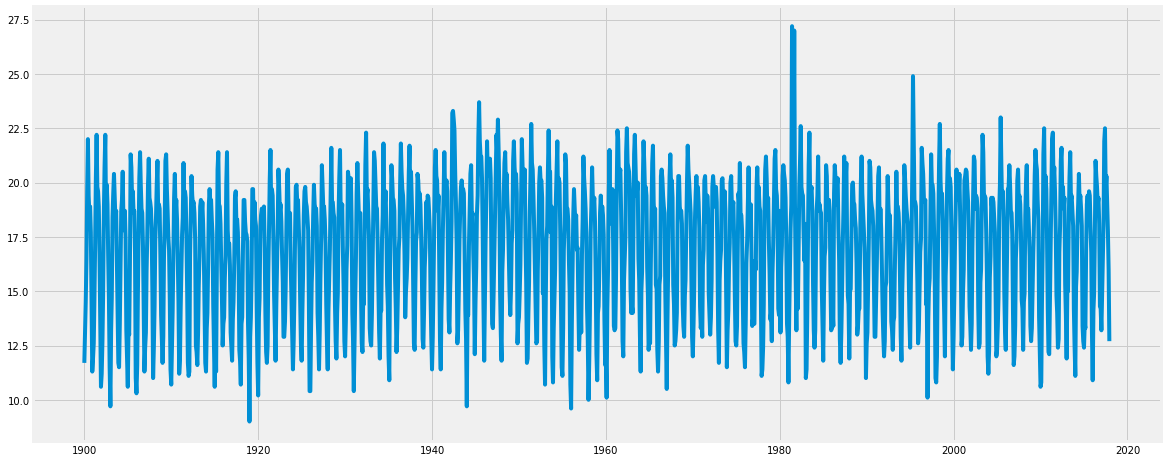

In [11]:
# graficar la serie de tiempo
plt.plot(ts)

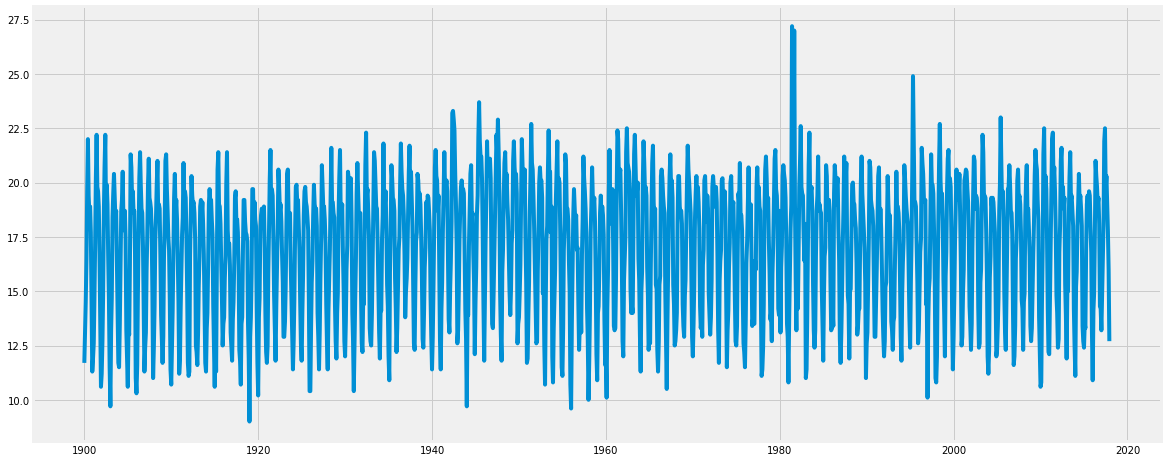

In [12]:
# graficar la serie de tiempo con un formato más visual
plt.plot(ts)

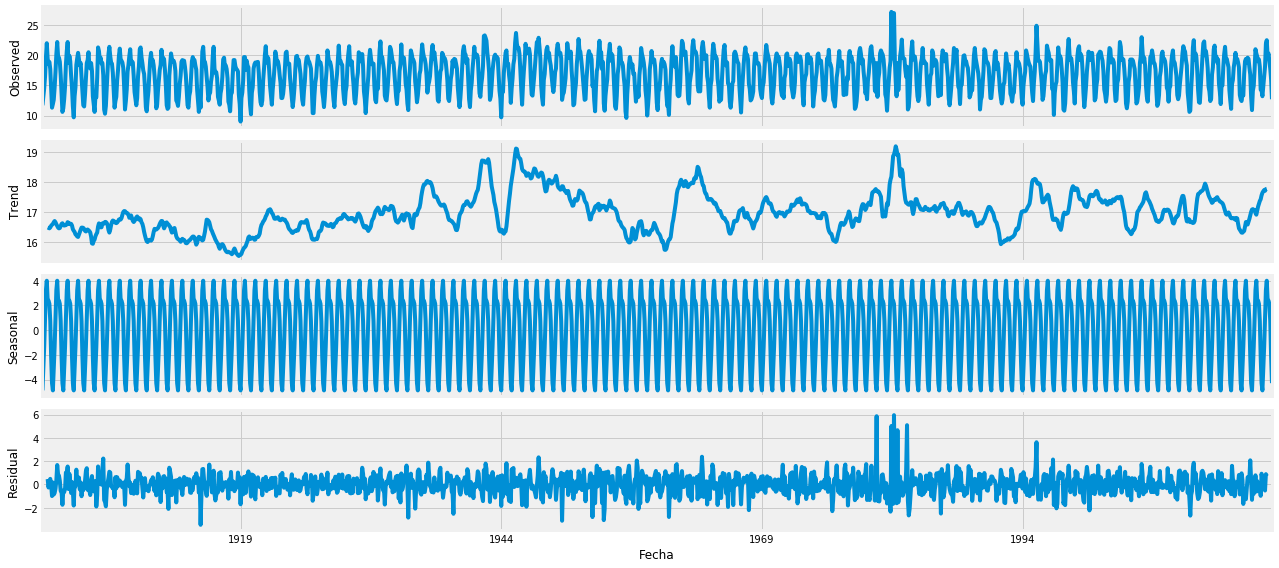

In [13]:
# desplegar gráficas
decomposition = sm.tsa.seasonal_decompose(ts, model='additive')
fig = decomposition.plot()
plt.show()

In [14]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [15]:
# obtener los parámetro optimo para el modelo
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(ts,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:12078.154666960205
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:10283.3590807754
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:4963.2931702725855
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:4208.600282565628
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:4966.230050612572
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:4241.504935633615
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:4565.058565632243
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:4211.257153065833
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:10314.757659156132
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:8921.760754886229
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:4893.5163394186575
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:4057.8134931949885
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:4898.208427887408
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:4916.093384924852
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:4446.318328561287
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:4059.813435128215
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:6084.662159720499
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:5664.420717545152
ARIMA(

In [16]:
mod = sm.tsa.statespace.SARIMAX(ts,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2294      0.026      8.788      0.000       0.178       0.281
ma.L1         -0.9147      0.013    -73.099      0.000      -0.939      -0.890
ar.S.L12      -0.0491      0.024     -2.020      0.043      -0.097      -0.001
ma.S.L12      -1.0000     17.317     -0.058      0.954     -34.942      32.942
sigma2         0.9474     16.415      0.058      0.954     -31.226      33.121


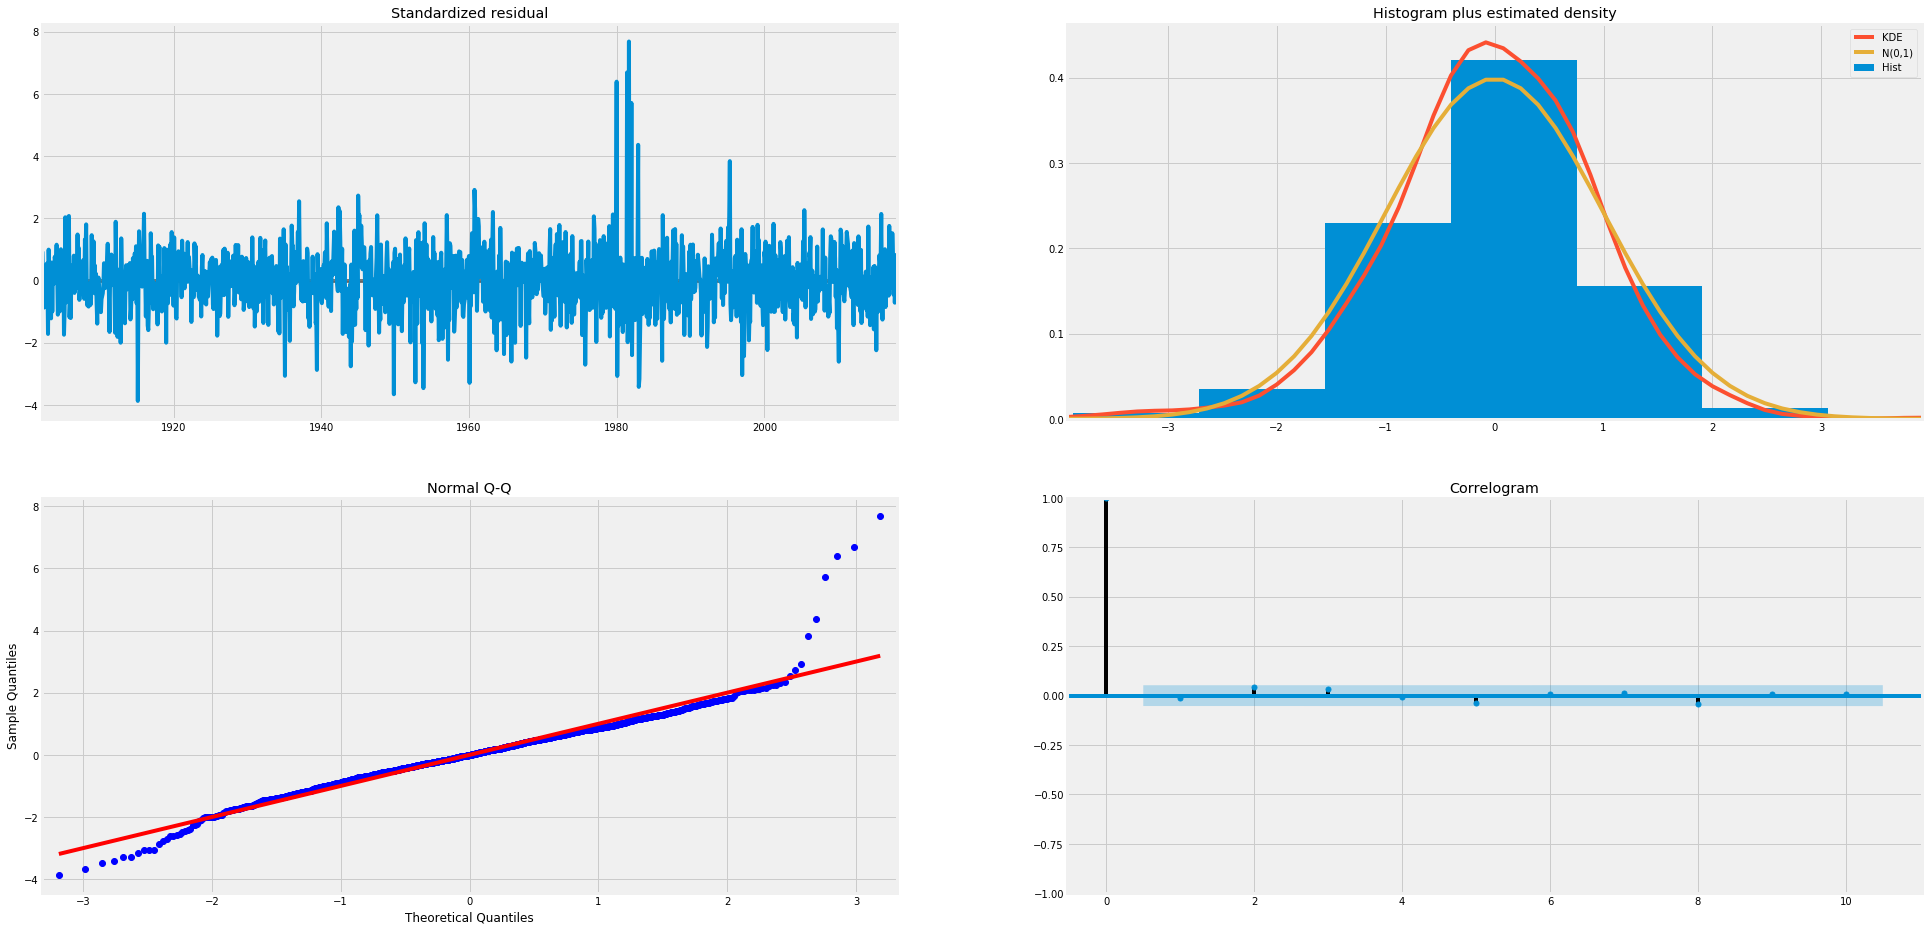

In [17]:
results.plot_diagnostics(figsize=(30, 16))
plt.show()

In [18]:
pred = results.get_prediction(start=pd.to_datetime('2017-01-01'), dynamic=False)
pred_ci = pred.conf_int()

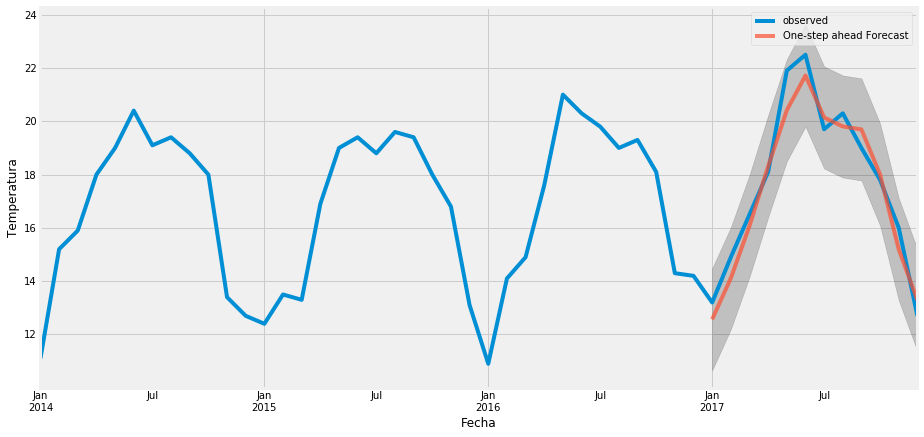

In [19]:
ax = ts['2014':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura')
plt.legend()
plt.show()

In [20]:
y_forecasted = pred.predicted_mean
y_truth = ts['2017-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 0.5


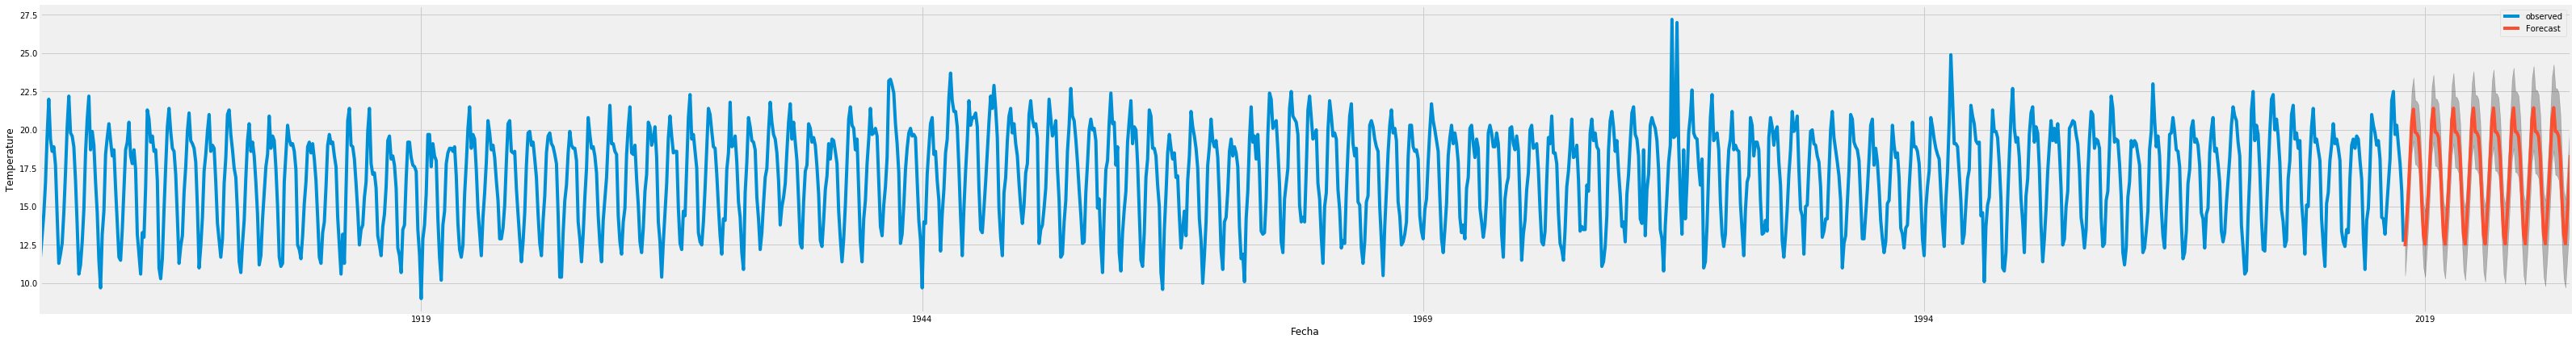

In [21]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = ts.plot(label='observed', figsize=(50, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperature')
plt.legend()
plt.show()

In [22]:
pred_uc.predicted_mean['2019-05'][0]

20.653314587376823

In [23]:
ts["1900"]

Fecha
1900-01-01    11.7
1900-02-01    13.1
1900-03-01    14.5
1900-04-01    16.5
1900-05-01    19.6
1900-06-01    22.0
1900-07-01    19.4
1900-08-01    18.6
1900-09-01    18.9
1900-10-01    17.7
1900-11-01    14.4
1900-12-01    11.3
Name: Valor, dtype: float64

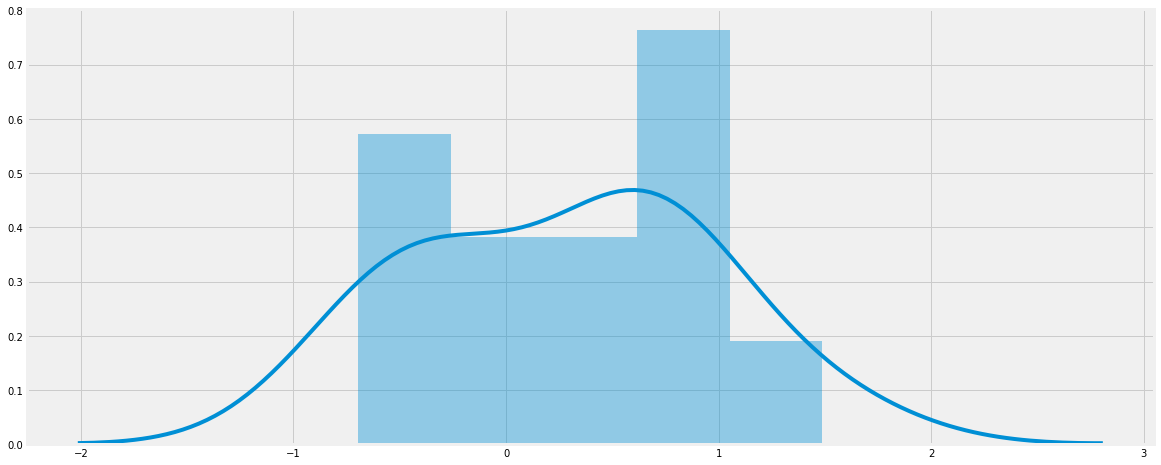

In [24]:
sns.distplot((y_truth-y_forecasted), bins=5)

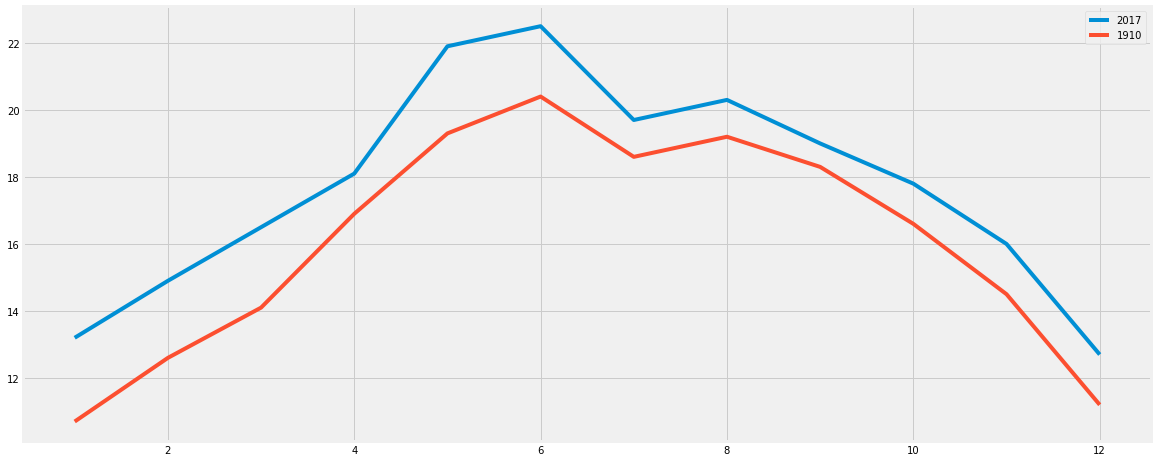

In [25]:
# evaluar las diferencias
X = np.arange(1,13)
plt.plot(X,y_truth.values, label="2017")
#plt.plot(X,ts["1950"].values, label="1950")
plt.plot(X,ts["1910"].values, label="1910")
plt.legend()